In [66]:
# Common packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from scipy.integrate import solve_ivp
from collections import defaultdict
import time

import torch
import torch.nn as nn
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

def simulate_ODEs(u_init, t_span, obs_num):
    def odes(t, u):
        du1dt = np.exp(-t/10) * u[1] * u[2]
        du2dt = u[0] * u[2]
        du3dt = -2 * u[0] * u[1]
        return [du1dt, du2dt, du3dt]
    # Solve ODEs
    t_eval = np.linspace(t_span[0], t_span[1], obs_num)
    sol = solve_ivp(odes, t_span, u_init, method='RK45', t_eval=t_eval)
    u_obs = np.column_stack((sol.t, sol.y[0], sol.y[1], sol.y[2]))
    return u_obs

# Set up simulation
u_init = [1, 0.8, 0.5]
t_span = [0, 10]
obs_num = 1000
u_obs = simulate_ODEs(u_init, t_span, obs_num)
df = pd.DataFrame(u_obs, columns=['t', 'u1', 'u2', 'u3'])

# Make training data
train_samples = 40
t_train = np.linspace(0, 6, train_samples)
u_train = simulate_ODEs(u_init, [0, 6], train_samples)
df_train = pd.DataFrame(u_train, columns=['t', 'u1', 'u2', 'u3'])

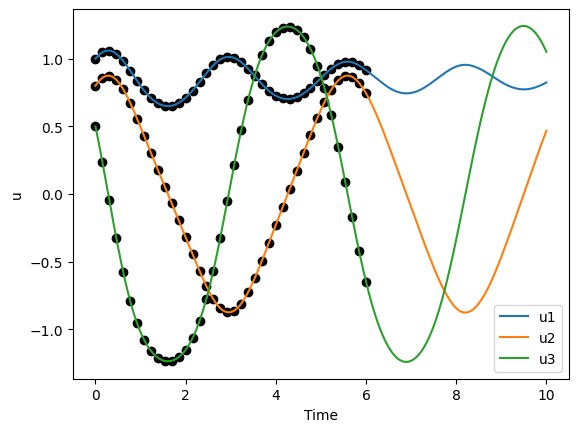

In [67]:
def grad(outputs, inputs):
    return torch.autograd.grad(outputs, inputs, grad_outputs=torch.ones_like(outputs), create_graph=True)

def ode_loss(model: torch.nn.Module):
    ts = torch.linspace(t_span[0], t_span[1], obs_num).view(-1, 1).requires_grad_(True).to(DEVICE)
    ys = model(ts)
    dy_dt = grad(ys, ts)[0] # Calculate the sum of the derivatives
    ode =    

In [94]:
def np_to_tensor(x):
    n_samples = len(x)
    return torch.from_numpy(x).to(torch.float).to(DEVICE).reshape(n_samples, -1)

class u_net(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.epochs = 100
        self.loss = nn.MSELoss()
        
        self.fc1 = nn.Linear(input_dim, 50)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, output_dim)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x
    
    def fit(self, X, y):
        Xt = np_to_tensor(X)
        yt = np_to_tensor(y)
        
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)       
        pass
    
    def predict(self, x):
        pass
    
class f_net(u_net):
    def __init__(self, input_dim, output_dim):
        super().__init__(input_dim, output_dim)
        
        self.a = nn.Parameter(data=torch.tensor([0.]))
        self.b = nn.Parameter(data=torch.tensor([0.]))